Question 1. What are upper and lower bounds on pij? Provide a justification for using log-normalized return instead of regular return?

Answer: The upper and lower bound of on pij is +1 and -1

In [22]:
library('igraph')
library('data.table')
names_sector = fread("finance_data/Name_sector.csv")

Question 2. Plot a histogram showing the un-normalized distribution of edge weights

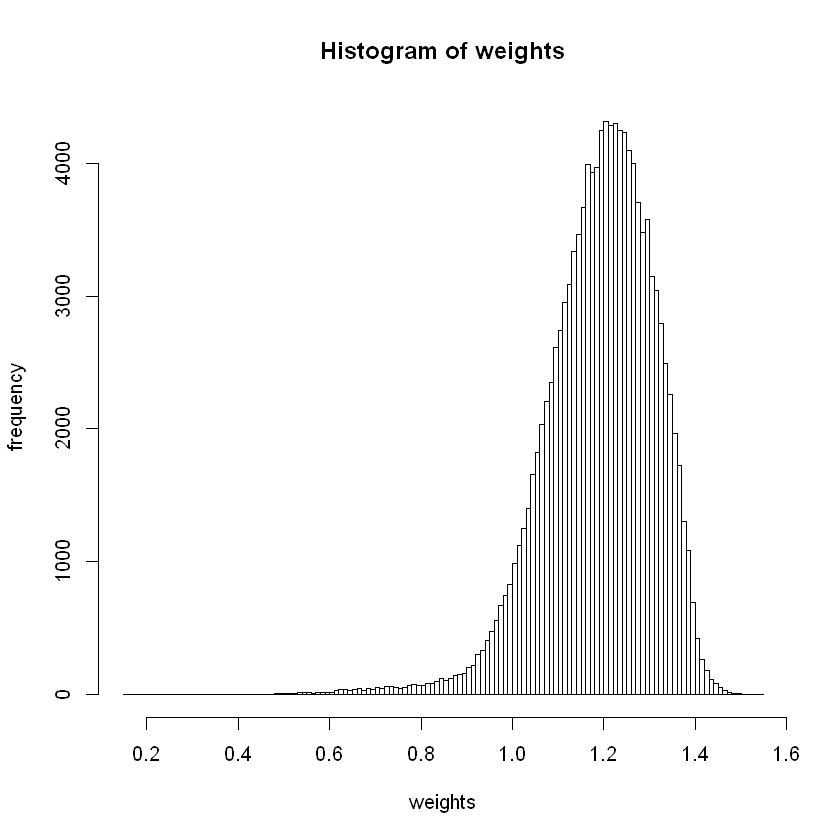

In [23]:
g = read.graph("weight_day.txt", format="ncol")
deg = degree(g)
weigts = edge.attributes(g)[['weight']]
hist(weigts, xlab="weights", ylab="frequency", main="Histogram of weights", breaks=100)

Question 3

IGRAPH 9235be7 UNW- 494 121771 -- 
+ attr: name (v/c), weight (e/n), weights (e/n)
+ edges from 9235be7 (vertex names):
 [1] A--AAL  A--AAP  A--AAPL A--ABBV A--ABC  A--ABT  A--ACN  A--ADBE A--ADI 
[10] A--ADM  A--ADP  A--ADS  A--ADSK A--AEE  A--AEP  A--AES  A--AET  A--AFL 
[19] A--AGN  A--AIG  A--AIV  A--AIZ  A--AJG  A--AKAM A--ALB  A--ALK  A--ALL 
[28] A--ALLE A--ALXN A--AMAT A--AMD  A--AME  A--AMG  A--AMGN A--AMP  A--AMT 
[37] A--AMZN A--AN   A--ANTM A--AON  A--APA  A--APC  A--APD  A--APH  A--ARE 
[46] A--ARNC A--ATVI A--AVB  A--AVGO A--AVY  A--AWK  A--AXP  A--AYI  A--AZO 
[55] A--BA   A--BAC  A--BAX  A--BBBY A--BBT  A--BBY  A--BCR  A--BDX  A--BEN 
[64] A--BF.B A--BHI  A--BIIB A--BK   A--BLK  A--BLL  A--BMY 
+ ... omitted several edges

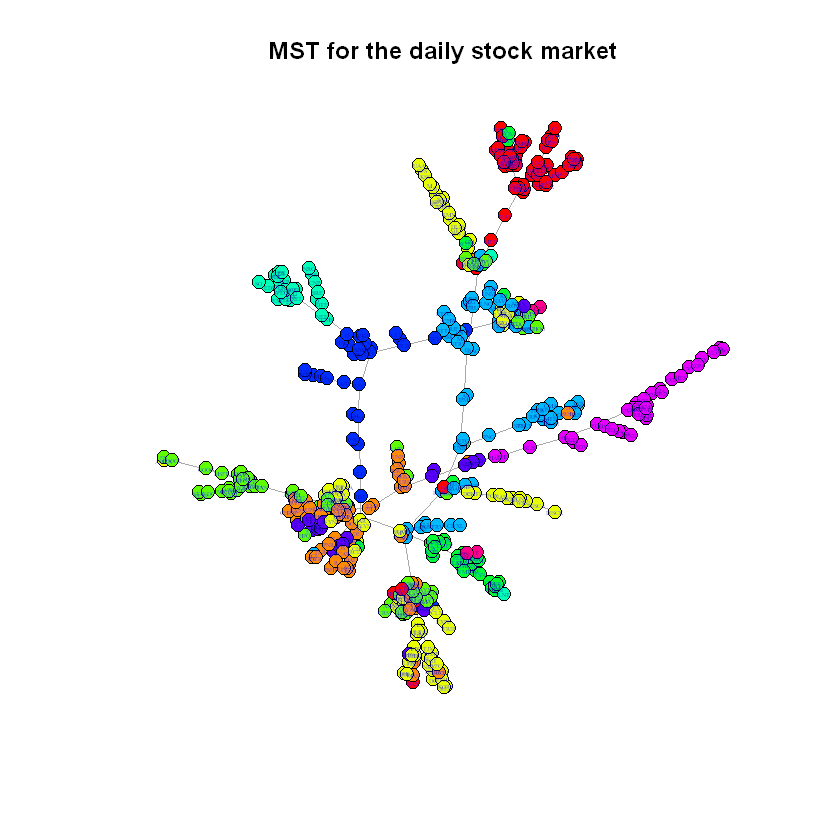

In [26]:
sectors = unique(names_sector$Sector)
set_edge_attr(g,"weights", value = weigts)
g_mst = mst(g,weights = weigts)
hue = rainbow(n = length(sectors))
for (i in 1:length(V(g_mst))){
  sector_i = names_sector$Sector[which(names_sector$Symbol == V(g_mst)[i]$name)]
  #print(sector_i)
  V(g_mst)[i]$sector = sector_i
  V(g_mst)[i]$color = hue[which(sectors == sector_i)]
}
plot(g_mst, vertex.size = 5, vertex.label.cex=0.3,vertex.label.dist=0, main = "MST for the daily stock market")

In [27]:
print(length(E(g)))
print(length(V(g)))

[1] 121771
[1] 494


Question 4

In [28]:
#Question 4
section_sizes = c()
for (sec in sectors){
  section_sizes = c(section_sizes,length(V(g_mst)[which(V(g_mst)$sector == sec)]))
}

alpha1 = c()
alpha2 = c()
for (i in 1:length(V(g_mst))){
  neighbors = neighbors(g_mst,V(g_mst)[i])
  count = 0 
  sector_i = V(g_mst)[i]$sector
  for (j in 1:length(neighbors)){
    if(neighbors[j]$sector==sector_i){
      count = count + 1
    }
  }
  alpha1 = c(alpha1, (count / length(neighbors)))
  alpha2 = c(alpha2,  (section_sizes[which(sectors == sector_i)] / length(V(g_mst))))
  #print(sector_i)
}
alpha1 = sum(alpha1) / length(V(g_mst))
alpha2 = sum(alpha2) / length(V(g_mst))

print(alpha1)
print(alpha2)

[1] 0.8289301
[1] 0.1141881


Question 5

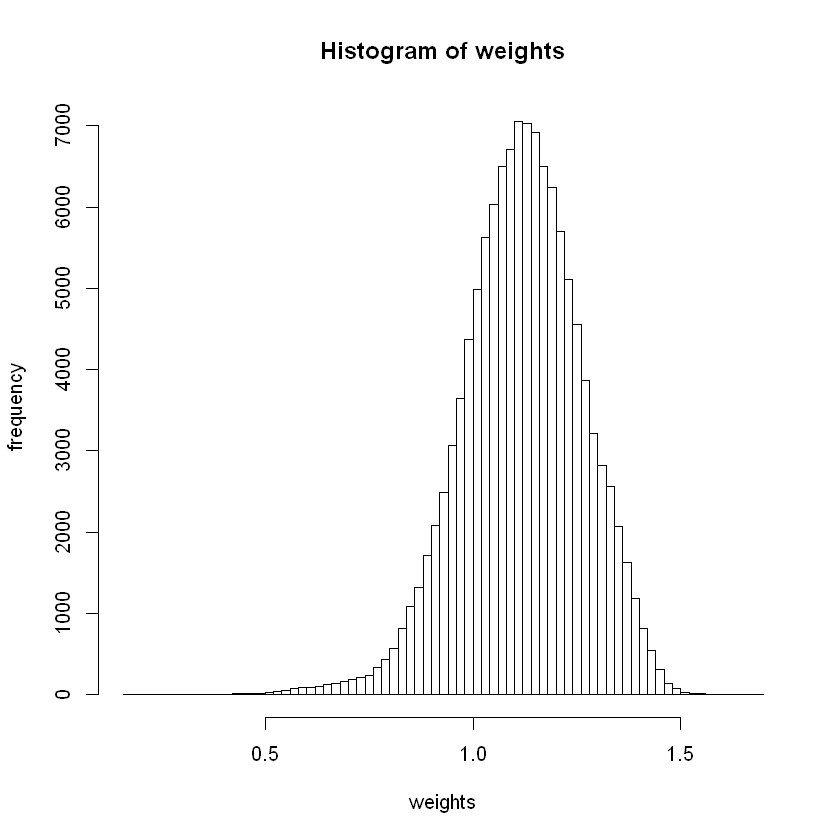

In [29]:
# Question 5
g = read.graph("weight_week.txt", format="ncol")
deg = degree(g)
weigts = edge.attributes(g)[['weight']]
hist(weigts, xlab="weights", ylab="frequency", main="Histogram of weights", breaks=100)

IGRAPH 9e36b46 UNW- 494 121771 -- 
+ attr: name (v/c), weight (e/n), weights (e/n)
+ edges from 9e36b46 (vertex names):
 [1] A--AAL  A--AAP  A--AAPL A--ABBV A--ABC  A--ABT  A--ACN  A--ADBE A--ADI 
[10] A--ADM  A--ADP  A--ADS  A--ADSK A--AEE  A--AEP  A--AES  A--AET  A--AFL 
[19] A--AGN  A--AIG  A--AIV  A--AIZ  A--AJG  A--AKAM A--ALB  A--ALK  A--ALL 
[28] A--ALLE A--ALXN A--AMAT A--AMD  A--AME  A--AMG  A--AMGN A--AMP  A--AMT 
[37] A--AMZN A--AN   A--ANTM A--AON  A--APA  A--APC  A--APD  A--APH  A--ARE 
[46] A--ARNC A--ATVI A--AVB  A--AVGO A--AVY  A--AWK  A--AXP  A--AYI  A--AZO 
[55] A--BA   A--BAC  A--BAX  A--BBBY A--BBT  A--BBY  A--BCR  A--BDX  A--BEN 
[64] A--BF.B A--BHI  A--BIIB A--BK   A--BLK  A--BLL  A--BMY 
+ ... omitted several edges

[1] "Health Care"
[1] "Industrials"
[1] "Consumer Discretionary"
[1] "Information Technology"
[1] "Health Care"
[1] "Health Care"
[1] "Health Care"
[1] "Information Technology"
[1] "Information Technology"
[1] "Information Technology"
[1] "Consumer Staples"
[1] "Information Technology"
[1] "Information Technology"
[1] "Information Technology"
[1] "Utilities"
[1] "Utilities"
[1] "Utilities"
[1] "Health Care"
[1] "Financials"
[1] "Health Care"
[1] "Financials"
[1] "Real Estate"
[1] "Financials"
[1] "Financials"
[1] "Information Technology"
[1] "Materials"
[1] "Industrials"
[1] "Financials"
[1] "Industrials"
[1] "Health Care"
[1] "Information Technology"
[1] "Information Technology"
[1] "Industrials"
[1] "Financials"
[1] "Health Care"
[1] "Financials"
[1] "Real Estate"
[1] "Consumer Discretionary"
[1] "Consumer Discretionary"
[1] "Health Care"
[1] "Financials"
[1] "Energy"
[1] "Energy"
[1] "Materials"
[1] "Information Technology"
[1] "Real Estate"
[1] "Industrials"
[1] "Information Techno

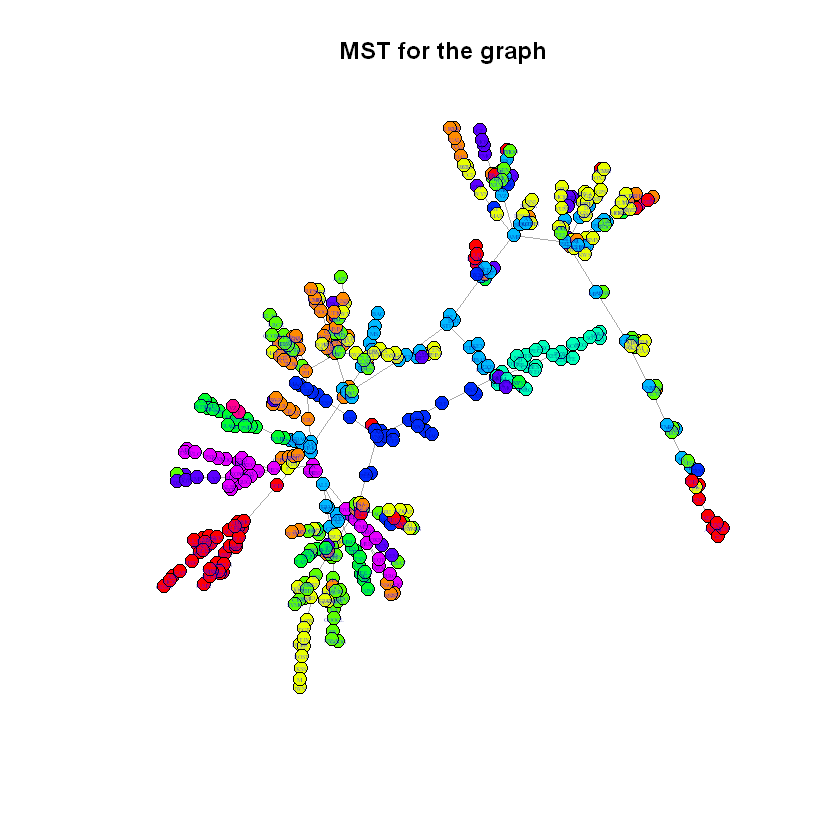

In [30]:
set_edge_attr(g,"weights", value = weigts)
g_mst_week = mst(g,weights = weigts)

hue = rainbow(n = length(sectors))
for (i in 1:length(V(g_mst_week))){
  sector_i = names_sector$Sector[which(names_sector$Symbol == V(g_mst)[i]$name)]
  print(sector_i)
  V(g_mst_week)[i]$sector = sector_i
  V(g_mst_week)[i]$color = hue[which(sectors == sector_i)]
}
plot(g_mst_week, 
     vertex.size = 5, 
     vertex.label.cex=0.3,vertex.label.dist=0, main = "MST for the graph"
)